In [1]:
import numpy as np
import pandas as pd
from source.moreka import AxonData
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt


In [2]:
data = AxonData(dirname='./data')
df = data[1].iloc[::50, :]

# Calculate the moving average with a window size of 10
window_size = 10
df['smoothed_signal'] = df['signal'].rolling(window=window_size, min_periods=1).mean()

/var/folders/r7/tkgkdkvx69326wjgg98cf2780000gn/T/ipykernel_1590/1434487389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_signal'] = df['signal'].rolling(window=window_size, min_periods=1).mean()


In [3]:
# Calculate the absolute differences between consecutive signal values
df['distance'] = abs(df['smoothed_signal'].diff().fillna(0))

# Calculate the cumulative sum in the 'time' column
df['distance'] = df['distance'].cumsum()

# Display the modified DataFrame
print(df)


          time    signal  smoothed_signal    distance
0        0.000  1.142578         1.142578    0.000000
50       0.005  1.155396         1.148987    0.006409
100      0.010  1.245117         1.181030    0.038452
150      0.015  1.099243         1.160583    0.058899
200      0.020  1.247559         1.177979    0.076294
...        ...       ...              ...         ...
599750  59.975  0.437317         0.455200  295.389886
599800  59.980  0.421753         0.469208  295.403893
599850  59.985  0.432434         0.456207  295.416894
599900  59.990  0.386353         0.431793  295.441308
599950  59.995  0.472412         0.436829  295.446343

[12000 rows x 4 columns]


/var/folders/r7/tkgkdkvx69326wjgg98cf2780000gn/T/ipykernel_1590/1882045407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = abs(df['smoothed_signal'].diff().fillna(0))
/var/folders/r7/tkgkdkvx69326wjgg98cf2780000gn/T/ipykernel_1590/1882045407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = df['distance'].cumsum()


<Axes: xlabel='distance', ylabel='smoothed_signal'>

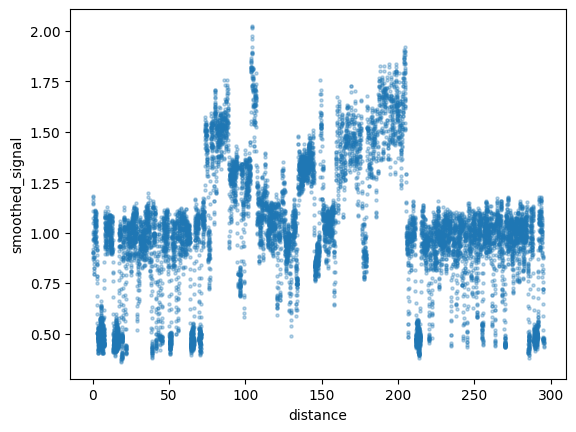

In [4]:
# plot df
df.plot(x='distance', y='smoothed_signal', kind='scatter', alpha=0.3, s=5)

In [5]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


In [6]:
# # Compute the distance matrix
# distance_matrix = squareform(pdist(df[['distance', 'smoothed_signal']]))
#
# # Sort the distances to visualize them
# sorted_distances = np.sort(distance_matrix, axis=None)


In [7]:
# # Plot the sorted distances
# plt.plot(sorted_distances)
# plt.xlabel('Index')
# plt.ylabel('Distance')
# plt.title('Sorted Distances')
# plt.show()


In [8]:
# Apply DBSCAN
dbscan = DBSCAN(eps=.1, min_samples=5)  # You can adjust eps and min_samples based on your data
labels = dbscan.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
df['cluster'] = labels

df

/var/folders/r7/tkgkdkvx69326wjgg98cf2780000gn/T/ipykernel_1590/1729826158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = labels


,time,signal,smoothed_signal,distance,cluster
0,0.000,1.142578,1.142578,0.000000,-1
50,0.005,1.155396,1.148987,0.006409,-1
100,0.010,1.245117,1.181030,0.038452,-1
150,0.015,1.099243,1.160583,0.058899,-1
200,0.020,1.247559,1.177979,0.076294,-1
...,...,...,...,...,...
599750,59.975,0.437317,0.455200,295.389886,110
599800,59.980,0.421753,0.469208,295.403893,110
599850,59.985,0.432434,0.456207,295.416894,110
599900,59.990,0.386353,0.431793,295.441308,110


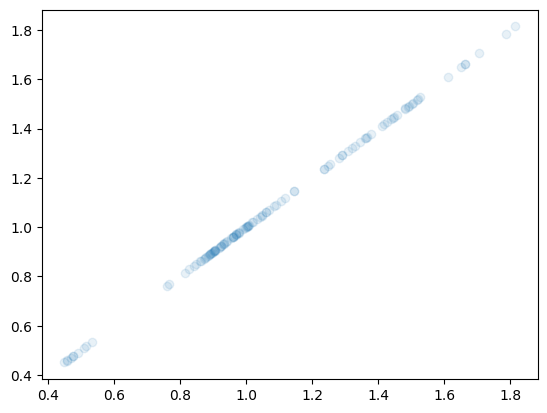

In [9]:
# remove datapoints with cluster -1
df = df[df['cluster'] != -1]
# calculate the mean of each cluster
cluster_means = df.groupby('cluster')['smoothed_signal'].mean()
cluster_means = pd.DataFrame(cluster_means)
cluster_means = cluster_means.reset_index()

plt.scatter(cluster_means['smoothed_signal'], cluster_means['smoothed_signal'], alpha=0.1)

In [10]:
df

,time,signal,smoothed_signal,distance,cluster
900,0.090,1.199341,0.963257,0.501397,0
1050,0.105,1.111450,1.004059,0.592431,0
1100,0.110,1.192627,1.011200,0.599572,0
1250,0.125,1.172180,0.973999,0.651299,0
1850,0.185,1.127319,0.968628,1.077386,0
...,...,...,...,...,...
599750,59.975,0.437317,0.455200,295.389886,110
599800,59.980,0.421753,0.469208,295.403893,110
599850,59.985,0.432434,0.456207,295.416894,110
599900,59.990,0.386353,0.431793,295.441308,110


In [11]:
# Apply DBSCAN to cluster_means
dbscan = DBSCAN(eps=.03, min_samples=2)  # You can adjust eps and min_samples based on your data
labels = dbscan.fit_predict(cluster_means.smoothed_signal.values.reshape(-1, 1))

new_cluster = []
# db['cluster'] = value of the index of the label in labels
for cluster in df.cluster:
    try:
        new_cluster.append(labels[cluster])
    except Exception as e:
        print(e)
        new_cluster.append(-1)
len(new_cluster)

8410

In [12]:
df['new_cluster'] = new_cluster
df

/var/folders/r7/tkgkdkvx69326wjgg98cf2780000gn/T/ipykernel_1590/877801832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_cluster'] = new_cluster


,time,signal,smoothed_signal,distance,cluster,new_cluster
900,0.090,1.199341,0.963257,0.501397,0,0
1050,0.105,1.111450,1.004059,0.592431,0,0
1100,0.110,1.192627,1.011200,0.599572,0,0
1250,0.125,1.172180,0.973999,0.651299,0,0
1850,0.185,1.127319,0.968628,1.077386,0,0
...,...,...,...,...,...,...
599750,59.975,0.437317,0.455200,295.389886,110,1
599800,59.980,0.421753,0.469208,295.403893,110,1
599850,59.985,0.432434,0.456207,295.416894,110,1
599900,59.990,0.386353,0.431793,295.441308,110,1


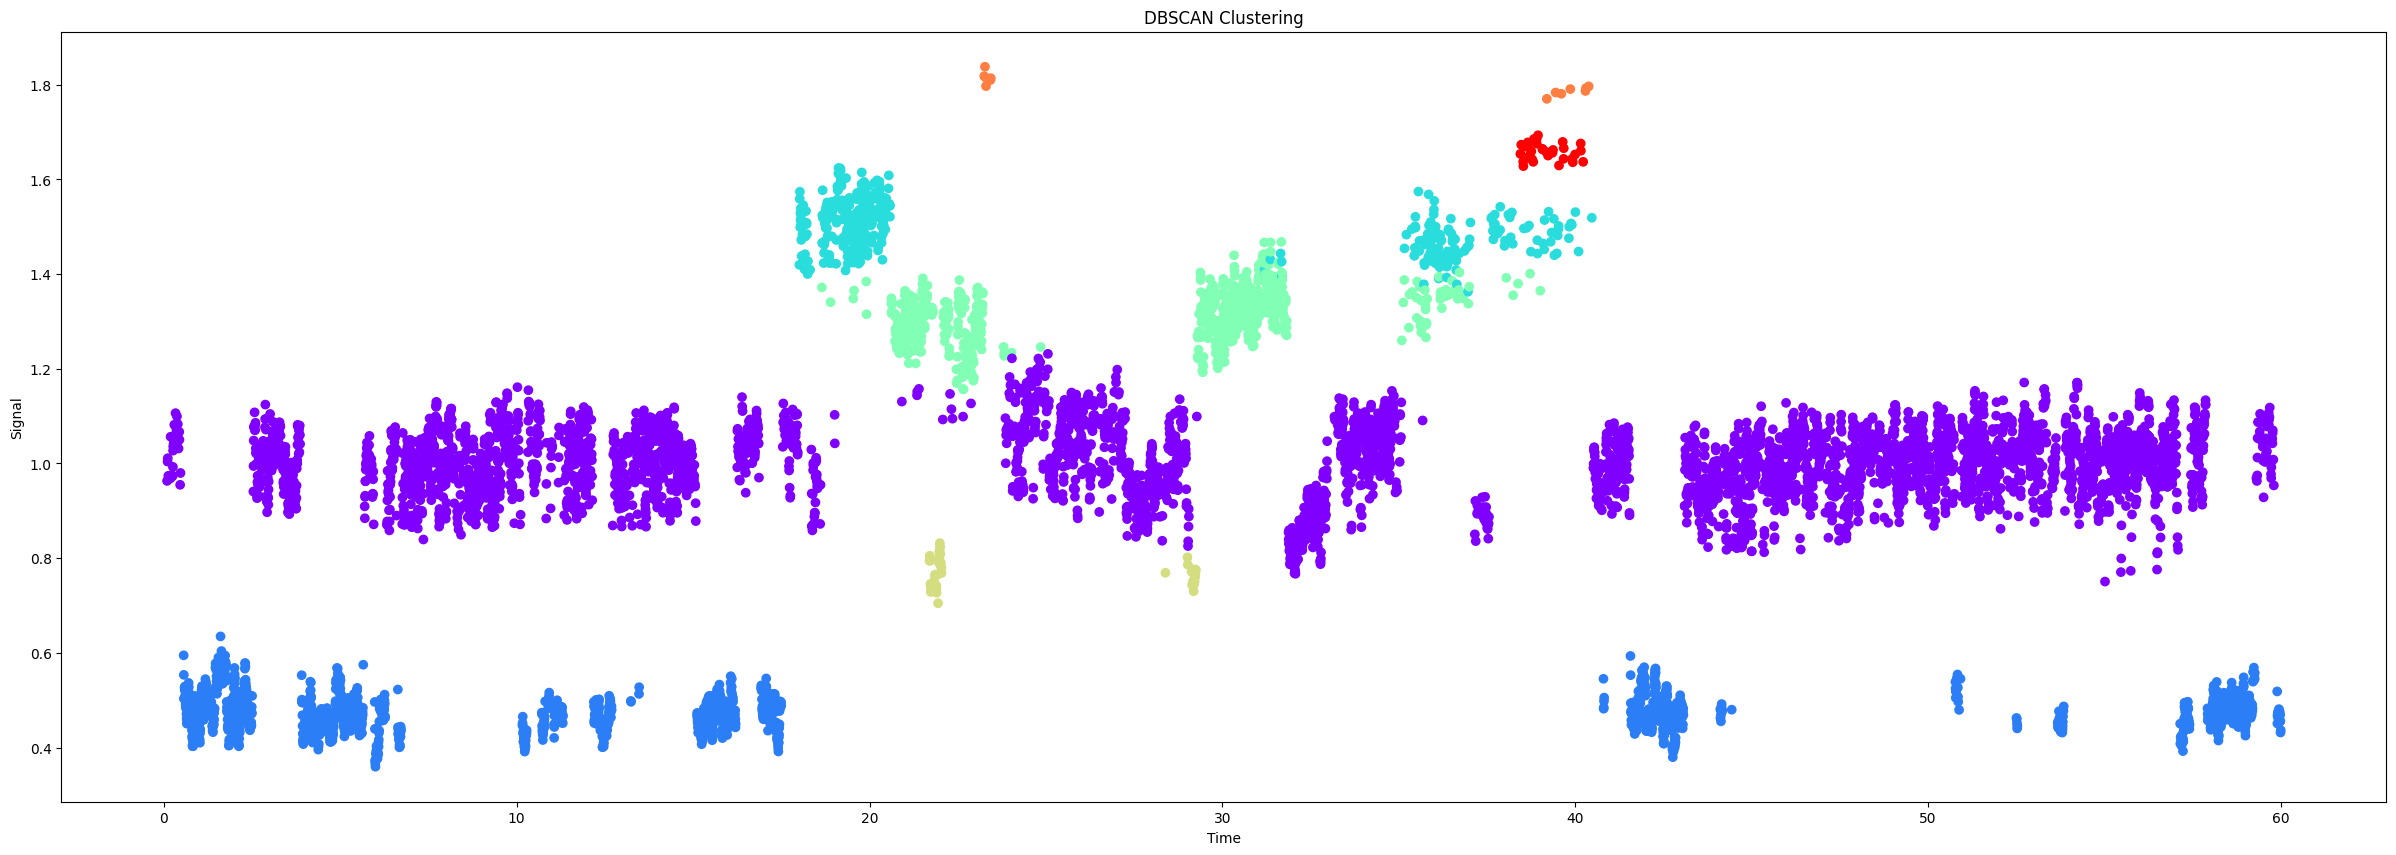

In [13]:
# Plot the clusters

# Filter out points with cluster -1
filtered_df = df[df['new_cluster'] != -1]

plt.figure(figsize=(30, 10))
plt.scatter(filtered_df['time'], filtered_df['smoothed_signal'], c=filtered_df['new_cluster'], cmap='rainbow', alpha=1)

# Add cluster labels next to each point for the first 100 points
# for index, row in filtered_df.iloc[0:500].iterrows():
#     plt.text(row['time'], row['smoothed_signal'], str(int(row['cluster'])), color='black')


plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('DBSCAN Clustering')
# plt.xlim(30, 40)
plt.show()
